***
<center><font color="dodgerblue"><font size="7"><b><i>Analyse de Données Développeur<br />(C5-160512-INFO)</i></b></font></font></center>

***

<center><font color="darkorange"><font size="8"><b><i>3) Réduction de dimensionnalité par ACP (TP) <br/><font size="6">&copy C. Frélicot, Automne 2023</font></i></b></font></font></center>

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.matlib import repmat
import warnings
warnings.filterwarnings('ignore')

***
# 1)  Tableau de données (du TD)
***
## Lecture de fichier formatté à l'aide de *Pandas*.

In [2]:
df = pd.read_excel("TD1-data.xls",index_col=0)
row_label = df.index.values 
col_label = df.columns.values
X = df[col_label].values
n, p = X.shape

## Paramètres (ACP) utilisateur.

In [3]:
I = np.eye(p)
D = np.eye(n)/n

## Copiez ici votre fonction python *standardize* du TP1 et vérifiez qu'elle retourne les bons résultats (TD).

In [4]:
def standardize(data,scale=False):
    
    data_p = data - np.mean(data, axis=0)
    if scale:
        data_s = data_p / np.std(data_p, axis=0)
        transformed_data = data_s
    else:
        transformed_data = data_p
    
    cov_data = np.cov(transformed_data.T)
    
    return transformed_data, cov_data

In [5]:
Xs, V = standardize(X,scale=True)

***
# 2) Solution de l'ACP
***

## 2-1) Pouvez-vous expliquer le bout de code ci-dessous, ligne par ligne ?

In [6]:
from numpy.linalg import eigh as eigen
[valp,vectp] = eigen(V)
valp = np.sort(valp)[::-1]
vectp = vectp[:, valp.argsort()]

In [7]:
# 1) La fonction *eigh* de *numpy.linalg* permet de calculer les valeurs propres et vecteurs propres d'une matrice carrée.

## 2-2) Calculez le tableau *Cp* (pour $C^\prime$) des composantes principales.

In [8]:
Cp = np.dot(Xs, vectp)

## Retrouvez-vous exactement les valeurs calculées en TD ?

## 2-3) Ecrivez une fonction *acpcanonique* ayant un seul argument d'entrée (lequel ?) et pour seuls arguments de sortie (lesquels ?) ceux nécessaires à l'analyse ultérieure (individus, variables) proprement dite. Vous la testerez sur les données $X$.

In [10]:
from numpy.linalg import eigh as eigen
def acpcanonique(data):
    Xs, V = standardize(data,scale=True)
    [valp,vectp] = eigen(V)
    valp = np.sort(valp)[::-1]
    vectp = vectp[:, valp.argsort()]
    
    components = np.dot(Xs, vectp)

    return valp, vectp, components

In [ ]:
valp, vectp, components = acpcanonique(X)



***
# 3) Analyse (individus, variables) des Composantes Principales
***

## 3-1) Calculez la qualité de représentation des variables par les composantes principales.

In [12]:
def acpqual(data,components):
    cosvar = np.corrcoef(data.T, components.T)[p:, :p]
    return cosvar

## 3-2) Calculez la qualité de représentation des individus sur les composantes principales.

In [13]:
def acpqual(data,components):
    cosind = np.corrcoef(data, components)[p:, :p]
    return cosind

## 3-3) Ecrivez une fonction *acpqual* retournant les éléments d'analyse (individus, variables) ci-dessus. Vous la testerez sur les données $X$. 

In [14]:
def acpqual(data,components):
    cosind = np.corrcoef(data, components)[p:, :p]
    cosvar = np.corrcoef(data.T, components.T)[p:, :p]
    return cosind, cosvar

In [15]:
cosind, cosvar = acpqual(X, components)

***
# 4) ACP de notes d'élèves de terminale (Exemple de CM)
***

## Lecture des données.

In [16]:
notes = pd.read_excel("terminale.xls",index_col=0)
row_label = notes.index.values 
col_label = notes.columns.values
notes

,math.,info.,fran.,angl.,arts
Prénom,,,,,
Thomas,6.0,6.0,5.0,5.5,8
Margaux,8.0,8.0,8.0,8.0,9
Florian,6.0,7.0,11.0,10.0,11
Lucie,15.0,14.0,16.0,15.0,8
Victor,14.0,14.0,12.0,12.5,10
Elena,11.0,10.0,5.5,7.0,13
Hugo,5.5,7.0,14.0,11.5,10
Nabil,13.0,12.5,8.5,9.5,12
Juliette,9.0,9.5,12.5,12.0,18


In [17]:
X = notes[col_label].values
n, p = np.shape(X)
I = np.eye(p)
D = np.eye(n)/n

## 4-1) Faut-il réaliser une ACP normée ?

## 4-2) Utilisez votre fonction *acpcanonique* de sorte d'obtenir les éléments de la solution de l'ACP.

In [18]:
valp, vectp, components = acpcanonique(X)

## Ci-dessous une fonction permettant d'afficher le *screeplot*. Utilisez-la pour choisir le nombre *q* de composantes à retenir.

In [19]:
def screeplot(L,fsize = 15):
    abscisse = np.arange(1,len(L)+1)
    ratioL = L / sum(L)
    cumratioL = np.cumsum(L) / sum(L)
    plt.plot(abscisse,ratioL,label='component variance') ; plt.plot(abscisse,cumratioL,label='cumulative variance')
    plt.xlabel("Principal Components",fontsize=fsize)
    plt.xticks(fontsize=fsize)
    plt.ylabel("Proportion of Variance",fontsize=fsize)
    plt.yticks(fontsize=fsize)
    plt.legend(loc='center right')
    plt.grid() 

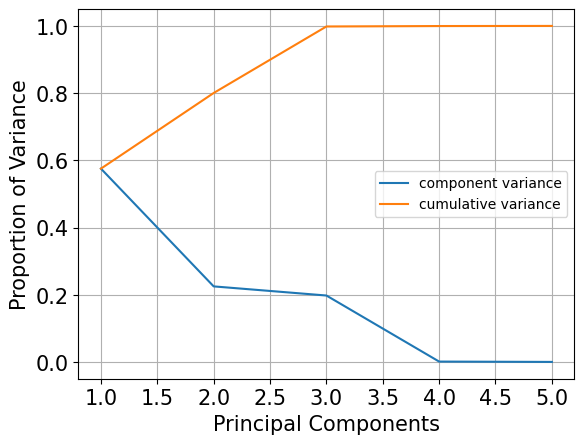

In [20]:
screeplot(valp)

## 4.4) Utilisez votre fonction *acpqual* de sorte de pouvoir donner des éléments d'interprétation (individus ET variables) des *q* composantes retenues

In [21]:
cosind, cosvar = acpqual(X, components)

In [22]:
cosind, cosvar

(array([[ 0.89277368,  0.68191905, -0.31630588, -0.78073036, -0.18638502],
        [-0.29197878,  0.065442  ,  0.90474922,  0.09575076, -0.58460308],
        [ 0.57550864,  0.25394969, -0.72639459, -0.40498486,  0.30437839],
        [ 0.69798244,  0.90536628,  0.80369958, -0.81786299, -0.98926544],
        [ 0.07000553, -0.23156119, -0.88286608,  0.1441512 ,  0.62400121],
        [ 0.14588671, -0.17459473, -0.88088277,  0.06751036,  0.59850063],
        [ 0.07436108,  0.03661237, -0.20616243,  0.04989188,  0.01675259],
        [ 0.22854257,  0.31782706,  0.53119971, -0.37978583, -0.42238138],
        [ 0.07830277,  0.16053088,  0.41013886, -0.22930465, -0.25183637],
        [-0.53919786, -0.6290039 , -0.55315579,  0.59640298,  0.69364119],
        [ 0.31938559,  0.3363054 ,  0.09703845, -0.24732294, -0.32097087],
        [-0.20611901, -0.15061499,  0.14147522,  0.09138449,  0.07510389],
        [-0.36348557, -0.01626193,  0.72045612,  0.2272682 , -0.46628584]]),
 array([[-0.81766877, -

## Ci-dessous une fonction d'affichage de cercle de corrélations (plan 1-2 par défaut). Testez-la pour plusieurs plans. 

In [23]:
def plot_correlation_circle(cosvar,plan=[1,2],var_labels=None,arrows=False,delta = 0.02):
    p = cosvar.shape[0]
    x = cosvar[:,np.array(plan)[0]-1]
    y = cosvar[:,np.array(plan)[1]-1]
    fig, axes = plt.subplots(figsize=(6,6))
    head = max(x.max()-x.min(),y.max()-y.min()) / 30
    axes.set_xlim(-1,1) ; axes.set_ylim(-1,1)
    plt.plot([-1,1],[0,0],'red') ; plt.plot([0,0],[-1,1],'red')
    for j in range(p): 
        if var_labels is None:
            plt.text(x[j]+delta,y[j]+delta,'X'+str(j+1),fontsize=20)
        else:
            plt.text(x[j]+delta,y[j]+delta,var_labels[j],fontsize=20)
        if arrows:
            plt.arrow(0,0,x[j],y[j], linewidth=2,color='orangered',head_width=0.075, head_length=0.075, length_includes_head=True)
        else:
            plt.plot(x[j],y[j], marker='o',markersize=10,color='orangered')
    cercle = plt.Circle((0,0),1,fill=True,color='pink',alpha=0.3)
    axes.add_artist(cercle)
    axes.set_xlabel('PC'+str(plan[0]),fontsize=20)
    axes.set_ylabel('PC'+str(plan[1]),fontsize=20)
    plt.grid()

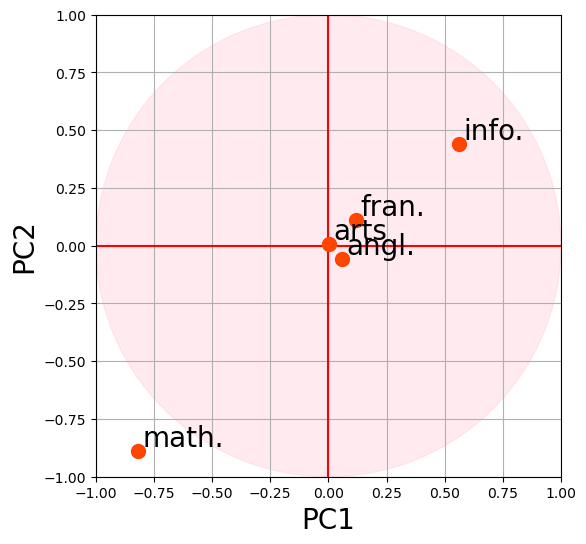

In [24]:
plot_correlation_circle(cosvar,var_labels=col_label)

## Ci-dessous une fonction d'affichage de plan factoriel (plan 1-2 par défaut).  Testez-la pour plusieurs plans. 

In [25]:
def plot_components_plane(components,plan=[1,2],ind_labels=None,arrows=False,delta = 0.02):
    n, p = components.shape
    x = components[:,np.array(plan)[0]-1]
    y = components[:,np.array(plan)[1]-1]
    fig, axes = plt.subplots(figsize=(8,8))
    head = max(x.max()-x.min(),y.max()-y.min()) / 30
    plt.plot([x.min()-1,x.max()+1],[0,0],'dodgerblue') ; plt.plot([0,0],[y.min()-1,y.max()+1],'dodgerblue')
    for j in range(n): 
        if ind_labels is None:
            plt.text(x[j]+delta,y[j]+delta,'x'+str(j+1),color='dodgerblue',fontsize=15)
        else:
            plt.text(x[j]+delta,y[j]+delta,ind_labels[j],color='dodgerblue',fontsize=15,zorder=10)
        if arrows:
            plt.arrow(0,0,x[j],y[j], linewidth=2, color='deepskyblue',head_width=head, head_length=head, length_includes_head=True,zorder=3)
        else:
            plt.plot(x[j],y[j], marker='o',markersize=10,color='dodgerblue')
    axes.set_xlabel('PC'+str(plan[0]),fontsize=20)
    axes.set_ylabel('PC'+str(plan[1]),fontsize=20)
    axes.set_facecolor('dodgerblue')
    axes.patch.set_alpha(0.1)
    plt.grid()
    plt.axis('equal')

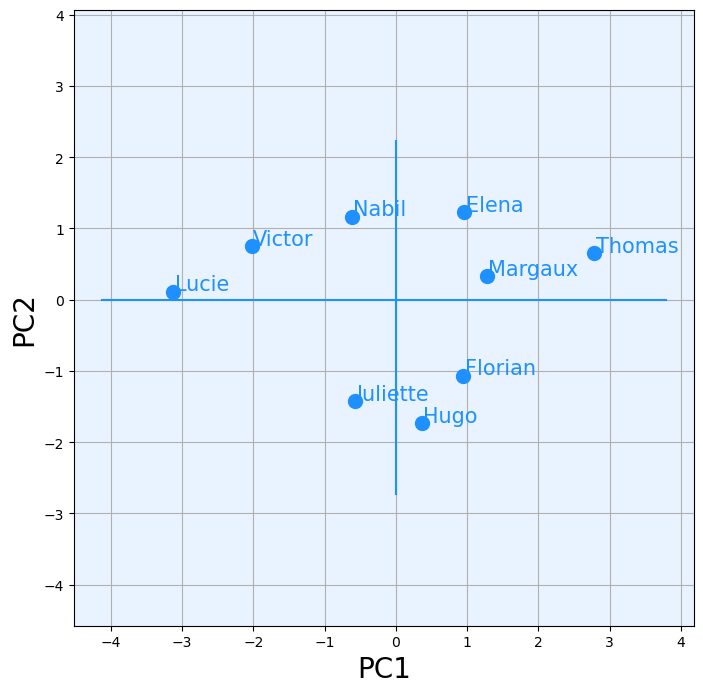

In [26]:
plot_components_plane(components,ind_labels=row_label)

***
# 5) ACP de composants chimiques de vins italiens
## Données Réelles : 13 mesures sur 178 vins de 3 viticulteurs différents provenant de la même région https://archive.ics.uci.edu/ml/datasets/wine
***

In [27]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
Y = data.target
Y_labels = data.target_names
col_labels = data.feature_names

In [28]:
n, p = np.shape(X)
I = np.eye(p)
D = np.eye(n)/n

## Réalisez l'ACP de ces données. N'ayant pas de compétences en chimie des vins, contentez-vous d'analyser graphiquement le 1er plan factoriel (individus ET variables).

In [29]:
valp, vectp, components = acpcanonique(X)

In [31]:
cosind, cosvar = acpqual(X, components)